In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df_mlp = pd.read_csv("df_3car_bert.csv")

In [3]:
df_mlp

,index,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,X..3-Carene
0,0,0.144370,0.133683,0.558613,0.002472,0.064213,-0.297644,0.649253,0.156834,-0.075428,...,0.171215,0.197233,-0.131170,0.210236,-0.728103,0.027258,-0.683708,-0.160281,-0.718498,1.0
1,0,0.144370,0.133683,0.558613,0.002472,0.064213,-0.297644,0.649253,0.156834,-0.075428,...,0.171215,0.197233,-0.131170,0.210236,-0.728103,0.027258,-0.683708,-0.160281,-0.718498,1.0
2,0,0.144370,0.133683,0.558613,0.002472,0.064213,-0.297644,0.649253,0.156834,-0.075428,...,0.171215,0.197233,-0.131170,0.210236,-0.728103,0.027258,-0.683708,-0.160281,-0.718498,1.0
3,0,0.144370,0.133683,0.558613,0.002472,0.064213,-0.297644,0.649253,0.156834,-0.075428,...,0.171215,0.197233,-0.131170,0.210236,-0.728103,0.027258,-0.683708,-0.160281,-0.718498,1.0
4,0,0.144370,0.133683,0.558613,0.002472,0.064213,-0.297644,0.649253,0.156834,-0.075428,...,0.171215,0.197233,-0.131170,0.210236,-0.728103,0.027258,-0.683708,-0.160281,-0.718498,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42967,0.237772,0.120746,0.629375,0.104186,0.032603,-0.432701,0.764779,0.083739,-0.119063,...,0.171331,0.111348,-0.115894,0.320711,-0.736399,0.117869,-0.834123,-0.191543,-0.876954,0.0
74996,42970,0.109320,0.095256,0.523631,-0.007430,0.055264,-0.338708,0.570877,0.232808,-0.009438,...,0.124365,0.174935,-0.110914,0.197620,-0.678949,0.039182,-0.663883,-0.163899,-0.593018,0.0
74997,42972,0.102736,0.135983,0.550969,-0.014671,0.015193,-0.269029,0.679146,0.145063,-0.059002,...,0.252791,0.156139,-0.121033,0.199727,-0.782018,-0.003939,-0.664979,-0.150894,-0.634808,0.0
74998,42974,0.282075,0.149575,0.652933,0.145363,0.003963,-0.429747,0.819131,0.018761,-0.133602,...,0.133490,0.180182,-0.139251,0.378032,-0.731045,0.157516,-0.825618,-0.148141,-0.877954,0.0


In [4]:
X = df_mlp.drop(['index', 'X..3-Carene'], axis = 1)
y = df_mlp[['X..3-Carene']]

Plotting histograms on target variable

<AxesSubplot:ylabel='Count'>

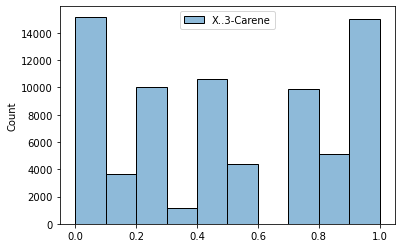

In [5]:
sns.histplot(y, bins = 10)

PCA

In [6]:
pca = PCA()
pca_comps = pca.fit_transform(X)

In [7]:
pca_comps

array([[ 1.63967541e+00, -5.72852724e-01, -3.26765788e-01, ...,
         5.77377117e-04, -9.74122606e-04,  1.49147485e-08],
       [ 1.63967541e+00, -5.72852724e-01, -3.26765788e-01, ...,
         5.77377117e-04, -9.74122606e-04,  1.49147412e-08],
       [ 1.63967541e+00, -5.72852724e-01, -3.26765788e-01, ...,
         5.77377117e-04, -9.74122606e-04,  1.49147392e-08],
       ...,
       [ 1.49168541e+00, -5.61520934e-01, -5.74873163e-01, ...,
         4.21335325e-03,  1.82254889e-03,  2.29239536e-08],
       [-2.63079256e+00,  1.11416778e+00, -1.31577635e-01, ...,
         2.43551934e-05, -1.58754216e-03, -6.56768275e-08],
       [ 5.96458422e+00,  9.14964947e-01,  6.45519654e-01, ...,
         9.96425247e-03,  9.89007466e-03,  7.81522324e-09]])

In [8]:
type(pca_comps)

numpy.ndarray

In [9]:
explained_variance = pca.explained_variance_ratio_

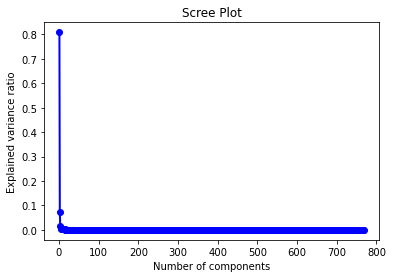

In [10]:
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.show()

In [11]:
# Calculate the second derivative of the explained variance ratio curve
second_der = np.diff(explained_variance, 2)

# Find the index of the maximum value of the second derivative
elbow_index = np.argmax(second_der) + 1

# The optimal number of components is the index of the elbow point
n_components_optimal = elbow_index

In [12]:
n_components_optimal

1

In [13]:
X_reduced = pca.transform(X)[:, :n_components_optimal]

In [14]:
X_reduced

array([[ 1.63967541],
       [ 1.63967541],
       [ 1.63967541],
       ...,
       [ 1.49168541],
       [-2.63079256],
       [ 5.96458422]])

train test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=1, test_size=0.2)

In [16]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

MLP (before feature selection and hyperparameter tuning)

In [17]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
mean_absolute_error(y_val, y_pred_mlp)

0.3111653226334763

In [19]:
mean_squared_error(y_val, y_pred_mlp)

0.12596987352636507

In [20]:
mean_squared_error(y_val, y_pred_mlp, squared = False)

0.3549223485867931

In [21]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.009383725464636283

In [22]:
#val
r2_score(y_val, y_pred_mlp)

0.004842324473421811

Hyperparameter tuning (MLP)

In [23]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [24]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [25]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [26]:
rscv.best_params_

{'max_iter': 1000, 'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu'}

In [27]:
joblib.dump(rscv, "rscv_mlp_bert_3car.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_bert_best_params_3car.pkl")

['rscv_mlp_bert_best_params_3car.pkl']

kNN (after hyperparameter tuning)

In [28]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=1000, activation = 'relu', hidden_layer_sizes= (50,50,50), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.3097217209676473

In [30]:
mean_squared_error(y_val, y_pred_mlp_ht)

0.1253298530446365

In [31]:
mean_squared_error(y_val, y_pred_mlp_ht, squared = False)

0.35401956590651384

In [32]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.015330260147842556

In [33]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.009898464303180976

Predicting on the test set (MLP)

In [34]:
y_pred_mlp_test = mlpreg_ht.predict(X_test)

In [35]:
joblib.dump(y_pred_mlp_test, "y_pred_mlp_test_bert_3car.pkl")
joblib.dump(y_test, "y_test_mlp_bert_3car.pkl")

['y_test_mlp_bert_3car.pkl']

In [36]:
mean_absolute_error(y_test, y_pred_mlp_test)

0.31319959250869545

In [37]:
mean_squared_error(y_test, y_pred_mlp_test)

0.1278441071821663

In [38]:
mean_squared_error(y_test, y_pred_mlp_test, squared = False)

0.35755294318767156

In [39]:
r2_score(y_test, y_pred_mlp_test)

0.011713380647440319

Error analysis (kNN)

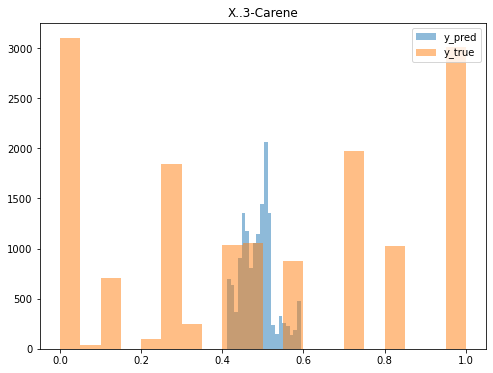

<Figure size 432x288 with 0 Axes>

In [40]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..3-Carene"  # specify the target variable name
ax.hist(y_pred_mlp_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_bert_3car.png')

Pearson R

In [41]:
corr_coef, p_value = pearsonr(y_pred_mlp_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.108
P-value: 0.000


<AxesSubplot:>

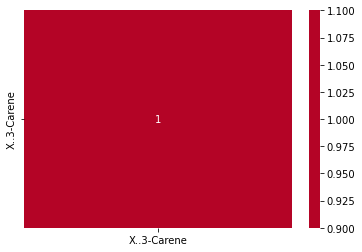

In [42]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)